Exploring estimating the eigenvalue decomposition of coherence matrix with QR decomposition.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
dim = 10000

RandA = np.random.randn(dim,dim)
t0 = time.time()
Q,R = np.linalg.qr(RandA)
t1 = time.time()
qr_time = t1-t0

print("QR time: ", qr_time)

t0 = time.time()
U, S, Vh = np.linalg.svd(RandA)
t1 = time.time()
svd_time = t1-t0

print("SVD time: ", svd_time)

t0 = time.time()
eigenvals, _ = np.linalg.eig(RandA@RandA.transpose())
t1 = time.time()
eig_time = t1-t0

print("Eigenvalue time: ", svd_time)

QR time:  24.44688320159912
SVD time:  202.18275237083435
Eigenvalue time:  202.18275237083435


Make plots of estimates

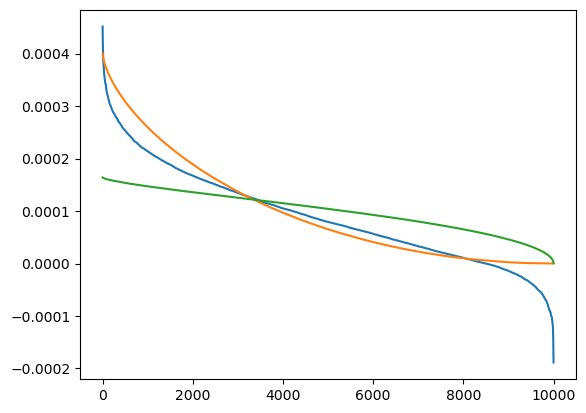

In [5]:
qr_approx = np.sort(np.sum(R@R.transpose(), axis=0))[::-1]
qr_approx = qr_approx/np.sum(np.absolute(qr_approx))

# qr_approx = np.sort(np.sum(R, axis=1))[::-1]
# qr_approx = qr_approx/np.sum(np.absolute(qr_approx))

# qr_approx = np.sort(np.diagonal(R@R.transpose()))[::-1]/np.sum(np.absolute(np.diagonal(R@R.transpose())))

# qr_approx = np.sort(np.diagonal(R))[::-1]/np.sum(np.absolute(np.diagonal(R)))

actual_eigenval = np.sort(eigenvals)[::-1]
actual_eigenval = actual_eigenval/np.sum(actual_eigenval)
svd_approx = np.sqrt(S)
svd_approx = svd_approx/np.sum(svd_approx)

plt.plot(qr_approx )
plt.plot(actual_eigenval)
plt.plot(svd_approx)

# plt.plot(np.sort(np.diagonal(R@R.transpose()))[::-1]/np.sum(np.absolute(np.diagonal(R@R.transpose()))))
# plt.plot(S/np.sum(S))

# plt.plot(np.sort(np.diagonal(R))[::-1])
# plt.plot(S)

In [ ]:
RRh = R@R.transpose()

plt.imshow(RRh,vmin=0, 
           vmax=np.percentile(np.absolute(RRh),90), aspect='auto')

plt.colorbar()

Plot gershgorin circles around RRh estimates to see overlap

In [ ]:
a = 1
radius = np.sum(np.absolute(RRh[a-1,a:]))

theta = np.linspace( 0 , 2 * np.pi , 150 )
 
x = radius * np.cos( theta )
y = radius * np.sin( theta )

plt.plot(x+RRh[a-1,a-1],y+RRh[a-1,a-1])

In [ ]:
figure, axes = plt.subplots()
# axes.set_aspect( 1 )
# plt.title( 'Circle' )
a=1
radius = np.sum(np.absolute(RRh[a-1,a:]))
Drawing_uncolored_circle = plt.Circle((a,RRh[a-1,a-1]), radius, fill=False)
axes.add_artist( Drawing_uncolored_circle )


# for a in range(1,len(R)+1):
#     radius = np.sum(np.absolute(RRh[a-1,a:]))
#     Drawing_uncolored_circle = plt.Circle((a,RRh[a-1,a-1]), radius, fill=False)
#     axes.add_artist( Drawing_uncolored_circle )
# plt.show()

In [ ]:
print(qr_approx[0]/qr_approx[1])
print(actual_eigenval[0]/actual_eigenval[1])
print(svd_approx[0]/svd_approx[1])